Коэффициенты корреляции:
            CLASS      EXPN    INCOME      TEST
CLASS   1.000000 -0.316232  0.028070 -0.314331
EXPN   -0.316232  1.000000  0.061821  0.372974
INCOME  0.028070  0.061821  1.000000  0.750577
TEST   -0.314331  0.372974  0.750577  1.000000 



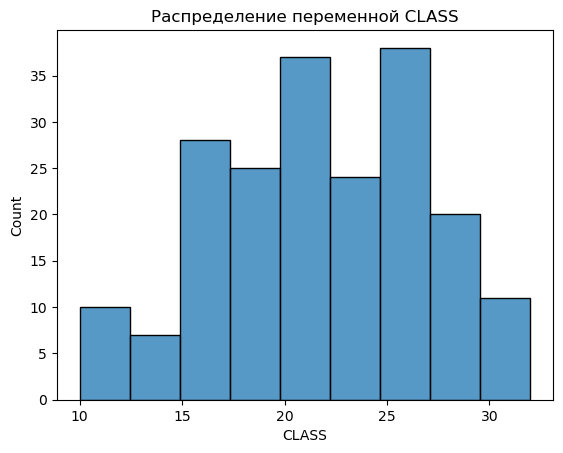

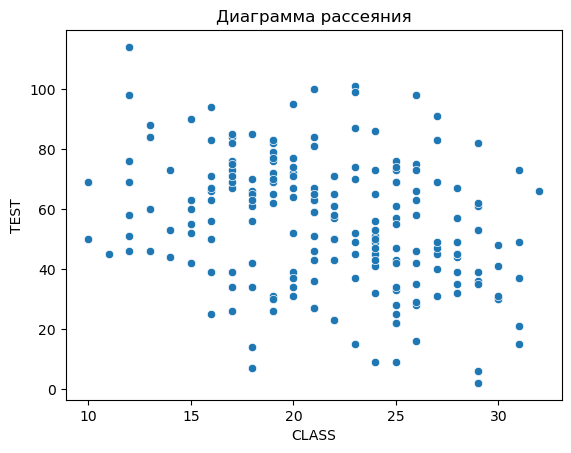

Модель 1: TEST ~ CLASS

                            OLS Regression Results                            
Dep. Variable:                   TEST   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     21.71
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           5.82e-06
Time:                        00:35:18   Log-Likelihood:                -885.26
No. Observations:                 200   AIC:                             1775.
Df Residuals:                     198   BIC:                             1781.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.6554      6

In [22]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Считываем CSV-файл с данными
data = pd.read_csv('Students.csv')
#см. виды графиков в документации библиотеки
# Графики для предварительного анализа данных
# Гистограмма для переменной CLASS
sns.histplot(data['CLASS'], kde=False)
plt.title("Распределение переменной CLASS")
plt.show()

# Диаграмма рассеяния для переменных CLASS и TEST
sns.scatterplot(x='CLASS', y='TEST', data=data)
plt.title("Диаграмма рассеяния")
plt.show()

# Модель 1: TEST ~ CLASS прим. ols - ordinary least squars(метод наименьших квадратов)
model_1 = smf.ols('TEST ~ CLASS', data=data).fit()
print("Модель 1: TEST ~ CLASS\n")
print(model_1.summary())

# Модель 2: TEST ~ CLASS + EXPN
model_2 = smf.ols('TEST ~ CLASS + EXPN', data=data).fit()
print("Модель 2: TEST ~ CLASS + EXPN\n")
print(model_2.summary())

# Модель 3: TEST ~ CLASS + EXPN + INCOME
model_3 = smf.ols('TEST ~ CLASS + EXPN + INCOME', data=data).fit()
print("Модель 3: TEST ~ CLASS + EXPN + INCOME\n")
print(model_3.summary())

# Сравнение моделей с использованием F-теста
#anova_lm - функция, сравниваеющая две или более линейные модели, чтобы определить, есть ли статистически значимое улучшение при добавлении новых переменных. 
#Она вычисляет F-статистику и p-значение, которые помогают понять, стоит ли включать дополнительные переменные в модель.
from statsmodels.stats.anova import anova_lm
print("Сравнение моделей 1 и 3 с использованием F-теста:\n")
print(anova_lm(model_1, model_3))

